<a href="https://colab.research.google.com/github/keith44/TF-Data_Science/blob/master/NY_BUS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('seaborn')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA

In [80]:
from google.colab import files
uploaded = files.upload()

Saving mta_1706.csv to mta_1706.csv


In [83]:
import io
mta = pd.read_csv(io.BytesIO(uploaded['mta_1706.csv']),encoding = "ISO-8859-1",error_bad_lines=False)

b'Skipping line 53192: expected 17 fields, saw 18\nSkipping line 56712: expected 17 fields, saw 18\nSkipping line 64874: expected 17 fields, saw 18\n'
b'Skipping line 80636: expected 17 fields, saw 18\nSkipping line 97072: expected 17 fields, saw 18\n'
b'Skipping line 107697: expected 17 fields, saw 18\nSkipping line 109317: expected 17 fields, saw 18\nSkipping line 119951: expected 17 fields, saw 18\n'
b'Skipping line 134667: expected 17 fields, saw 18\nSkipping line 139923: expected 17 fields, saw 18\nSkipping line 144309: expected 17 fields, saw 18\nSkipping line 157927: expected 17 fields, saw 18\nSkipping line 158907: expected 17 fields, saw 18\nSkipping line 161424: expected 17 fields, saw 18\n'
b'Skipping line 173221: expected 17 fields, saw 18\nSkipping line 173623: expected 17 fields, saw 18\nSkipping line 177253: expected 17 fields, saw 18\nSkipping line 181883: expected 17 fields, saw 18\nSkipping line 186684: expected 17 fields, saw 18\nSkipping line 191267: expected 17 fie

# Data Description

In [0]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0.0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1.0,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:49,0.0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:03:31,0.0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:22,1.0,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,23:59:38


In [0]:
 mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
<!DOCTYPE html>    144 non-null object
dtypes: object(1)
memory usage: 1.2+ KB


In [85]:
mta.shape

(6730436, 17)

# Data cleansing

In [0]:
mta.duplicated().sum()

0

In [0]:
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
mta.head()   

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.6161,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656,-73.907379,NYCT_430,40.63517,-73.960803,FOSTER AV/E 18 ST,approaching,76,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.6432,-74.073494,S I MALL YUKON AV,40.5759,-74.167686,NYCT_8263,40.590802,-74.15834,MERRYMOUNT ST/TRAVIS AV,approaching,62,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875,-73.880142,RIVERDALE 263 ST,40.9124,-73.902534,NYCT_4223,40.88601,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.7017,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.8812,-73.90934,MOTT HAVEN 136 ST via CONCOURSE,40.8097,-73.92836,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,2017-06-01 00:03:56,23:59:38


In [84]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime'],
      dtype='object')

In [0]:
mta.columns=['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime']

In [87]:
mta.isnull().sum()

RecordedAtTime               0
DirectionRef                 0
PublishedLineName            0
OriginName               63156
OriginLat                63156
OriginLong               63156
DestinationName              0
DestinationLat           10346
DestinationLong          10346
VehicleRef                   0
VehicleLocation_Lat          0
VehicleLocation_Long         0
NextStopPointName         7002
ArrivalProximityText      7002
DistanceFromStop          7002
ExpectedArrivalTime     872302
ScheduledArrivalTime    172333
dtype: int64

In [88]:
mta.isnull().sum()/mta.isnull().count()

RecordedAtTime          0.000000
DirectionRef            0.000000
PublishedLineName       0.000000
OriginName              0.009384
OriginLat               0.009384
OriginLong              0.009384
DestinationName         0.000000
DestinationLat          0.001537
DestinationLong         0.001537
VehicleRef              0.000000
VehicleLocation_Lat     0.000000
VehicleLocation_Long    0.000000
NextStopPointName       0.001040
ArrivalProximityText    0.001040
DistanceFromStop        0.001040
ExpectedArrivalTime     0.129606
ScheduledArrivalTime    0.025605
dtype: float64

We need to drop the rows with missing arrival times. It is usless to us if we can't find the bus is late or not.

In [89]:
mta = mta[mta.ExpectedArrivalTime.isnull()==False]  
mta.isnull().sum()

RecordedAtTime              0
DirectionRef                0
PublishedLineName           0
OriginName              53766
OriginLat               53766
OriginLong              53766
DestinationName             0
DestinationLat           8206
DestinationLong          8206
VehicleRef                  0
VehicleLocation_Lat         0
VehicleLocation_Long        0
NextStopPointName           0
ArrivalProximityText        0
DistanceFromStop            0
ExpectedArrivalTime         0
ScheduledArrivalTime    53766
dtype: int64

In [90]:
mta = mta[mta.ScheduledArrivalTime.isnull()==False]
mta.isnull().sum()

RecordedAtTime          0
DirectionRef            0
PublishedLineName       0
OriginName              0
OriginLat               0
OriginLong              0
DestinationName         0
DestinationLat          0
DestinationLong         0
VehicleRef              0
VehicleLocation_Lat     0
VehicleLocation_Long    0
NextStopPointName       0
ArrivalProximityText    0
DistanceFromStop        0
ExpectedArrivalTime     0
ScheduledArrivalTime    0
dtype: int64

In [91]:
len(mta)

5804368

In [0]:
# reindex dataset
mta.index = range(len(mta.index))

That took care of all of our null values, that we can tell anyway.

Next we need to create a target variable. We are trying to predict if a bus is going to be late or not so we will convert the time rows in to manageable data and the find the difference in times.

In [0]:
mta.loc[list(np.where(mta.ScheduledArrivalTime=='24:00:00')[0]),'ScheduledArrivalTime'] = '00:00:01'
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)

mta['ExpectedArrivalTime'] = pd.to_datetime(mta.ExpectedArrivalTime)
mta['ScheduledArrivalTime'] = mta.ExpectedArrivalTime.dt.date.astype('str') +' '+ mta.ScheduledArrivalTime.dt.time.astype('str')
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
index = mta[(mta.ScheduledArrivalTime.dt.hour==23) & (mta.ExpectedArrivalTime.dt.hour==00)].index
mta.loc[index,'ScheduledArrivalTime'] = mta.ScheduledArrivalTime + pd.DateOffset(days=-1)

mta.loc[list(np.where(mta.ExpectedArrivalTime>mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ExpectedArrivalTime -  mta.ScheduledArrivalTime).dt.minute 
mta.loc[list(np.where(mta.ExpectedArrivalTime<mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ScheduledArrivalTime - mta.ExpectedArrivalTime ).dt.minute*-1
mta.loc[list(np.where(mta.Time_delay.isna()==True)[0]),'Time_delay'] = 0

mta['Late_Bus'] = np.where(mta.Time_delay>7, 1, 0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [0]:
# create time of day feature
bins=[0, 600, 115900, 170000, 200000, 235959]
bin_names = ['night','morning','afternoon','evening','Night']
mta['time_of_day'] = pd.cut(pd.to_numeric(mta.ScheduledArrivalTime.dt.time.astype(str).str.replace(':','')), bins,labels=bin_names)
mta['time_of_day'] = mta['time_of_day'].str.lower()

In [0]:
# checking to make sure that time is only in the month of June
mta.ScheduledArrivalTime.dt.month.unique()

array([6, 5])

In [0]:
mta.drop(list(np.where(mta.ScheduledArrivalTime.dt.month==5)[0]),axis='index',inplace=True)
# reindex dataset
mta.index = range(len(mta.index))
mta.ScheduledArrivalTime.dt.month.unique()

array([6])

In [0]:
# test to see if it worked from a sample
mta.sample(frac=.001).head(10)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day
59789,2017-06-02 18:16:31,1,Bx12-SBS,PARKING RAMP/ACCESS RD,40.866,-73.827301,SELECT BUS SERVICE BROADWAY INWOOD,40.867786,-73.920547,NYCT_5786,40.855548,-73.876435,E FORDHAM RD/SOUTHERN BL,< 1 stop away,418,2017-06-02 18:17:41,2017-06-02 18:20:41,-3.0,0,evening
68739,2017-06-02 18:36:36,0,S40,GOETHALS RD N/MOBILE PK ROW,40.6277,-74.180664,ST GEORGE FERRY via RICH TR,40.643772,-74.073158,NYCT_8230,40.62498,-74.177857,FOREST AV/GOETHALS RD N,approaching,146,2017-06-02 18:36:56,2017-06-02 18:32:38,4.0,0,evening
42106,2017-06-02 17:46:43,0,B52,CADMAN PZ W/TILLARY ST,40.695999,-73.990944,RIDGEWOOD TERM via GATES,40.699261,-73.911163,NYCT_6528,40.695788,-73.915886,GATES AV/KNICKERBOCKER AV,< 1 stop away,178,2017-06-02 17:47:41,2017-06-02 17:32:20,15.0,1,evening
76347,2017-06-02 18:56:36,1,Bx9,BROADWAY/W 262 ST,40.9101,-73.896729,WEST FARMS,40.840641,-73.879807,NYCT_4722,40.840877,-73.879448,BOSTON RD/E 178 ST,approaching,39,2017-06-02 18:56:57,2017-06-02 18:22:00,34.0,1,evening
30987,2017-06-01 06:33:41,0,M10,8 AV/W 57 ST,40.766762,-73.982742,HARLEM 159 ST via 8 AV,40.831207,-73.935692,NYCT_6371,40.817702,-73.945668,FRED DOUGLASS BL/W 138 ST,approaching,125,2017-06-01 06:33:59,2017-06-01 06:35:00,-1.0,0,morning
35870,2017-06-01 06:33:33,0,B69,MC DONALD AV/CORTELYOU RD,40.638161,-73.978935,DNTWN BKLYN SANDS ST via VANDERBILT,40.699913,-73.987648,NYCT_253,40.676033,-73.971627,FLATBUSH AV/8 AV,approaching,31,2017-06-01 06:33:58,2017-06-01 06:34:20,0.0,0,morning
60103,2017-06-02 18:16:46,1,S53,4 AV/86 ST,40.6223,-74.028687,PT RICHMOND,40.640297,-74.131332,NYCT_7064,40.622237,-74.028579,4 AV/90 ST,< 1 stop away,317,2017-06-02 18:17:29,2017-06-02 18:22:05,-4.0,0,evening
52037,2017-06-02 18:06:40,0,B67,MC DONALD AV/CORTELYOU RD,40.638161,-73.978935,WLMSBRG WYTHE AV via FLBSH AV via NVY YD,40.70689,-73.967476,NYCT_253,40.686998,-73.979588,LIVINGSTON ST/NEVINS ST,< 1 stop away,181,2017-06-02 18:07:44,2017-06-02 18:12:11,-4.0,0,evening
63763,2017-06-01 07:44:02,0,S78,BRICKTOWN SHOPPING/CENTER,40.5301,-74.226295,ST GEORGE FERRY via HYLAN,40.643585,-74.072609,NYCT_8122,40.551864,-74.133673,HYLAN BL/BAY TERRACE,approaching,101,2017-06-01 07:44:28,2017-06-01 07:47:38,-3.0,0,morning
74779,2017-06-01 08:04:23,1,S74,ST GEORGE FERRY/S74 & S84,40.6432,-74.073814,BRICKTOWN MALL,40.53006,-74.226654,NYCT_8135,40.642839,-74.075181,BAY ST/NICK LAPORTE PL,approaching,127,2017-06-01 08:04:35,2017-06-01 08:00:42,3.0,0,morning


In [0]:
mta.Late_Bus.value_counts()

0    62644
1    25534
Name: Late_Bus, dtype: int64

In [0]:
len(mta)

88178

The conversion worked. We created a feature 'Time_delay' where the values are the minutes of delay ot the bus. Values that are greater than zero are the number of minutes past the scheduled arrival time. The values that are less that zero are the number of minutes the bus arrived ahead of schedule.

The 'Late_Bus' feature is labels a '1' for a bus who's arrival time is greater than 15 min past the scheduled arrival time and labels a '0' for anything under that time. This is our target


In [0]:
mta_samp = mta.sample(frac=.002, random_state=20)
len(mta_samp)

176

# Exploratory Data Analysis

In [0]:
mta.describe()

,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation_Lat,VehicleLocation_Long,DistanceFromStop,Time_delay,Late_Bus
count,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06,5.804118e+06
mean,5.021357e-01,4.072989e+01,-7.393121e+01,4.072896e+01,-7.393158e+01,4.072881e+01,-7.393090e+01,2.432863e+02,5.325231e+00,2.629414e-01
std,4.999955e-01,9.041787e-02,9.365776e-02,9.035588e-02,9.449930e-02,8.687426e-02,8.821707e-02,1.017995e+03,9.162814e+00,4.402309e-01
min,0.000000e+00,4.050688e+01,-7.424806e+01,4.050811e+01,-7.424819e+01,4.050288e+01,-7.425234e+01,0.000000e+00,-5.900000e+01,0.000000e+00
25%,0.000000e+00,4.066066e+01,-7.398737e+01,4.066085e+01,-7.398883e+01,4.065951e+01,-7.397881e+01,3.200000e+01,0.000000e+00,0.000000e+00
50%,1.000000e+00,4.071523e+01,-7.393245e+01,4.071336e+01,-7.393227e+01,4.072357e+01,-7.393620e+01,1.040000e+02,3.000000e+00,0.000000e+00
75%,1.000000e+00,4.080917e+01,-7.387994e+01,4.080908e+01,-7.387833e+01,4.080418e+01,-7.388325e+01,2.120000e+02,8.000000e+00,1.000000e+00
max,1.000000e+00,4.091237e+01,-7.370187e+01,4.091238e+01,-7.370139e+01,4.091239e+01,-7.370142e+01,3.360800e+04,5.900000e+01,1.000000e+00


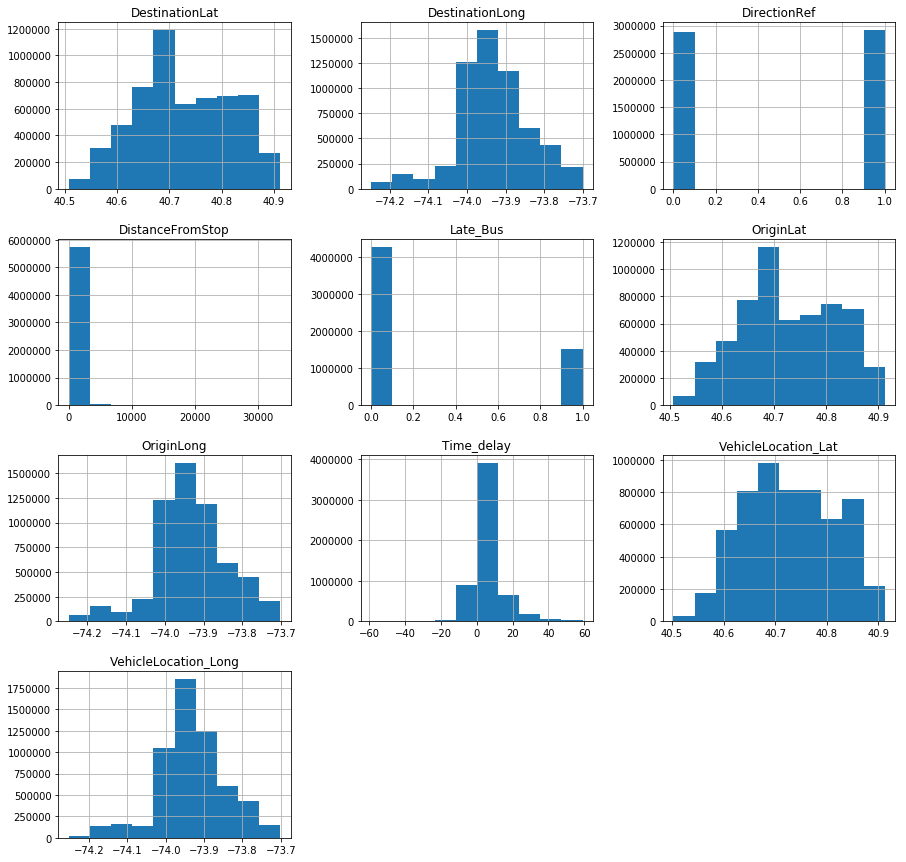

In [0]:
mta.hist(figsize=(15,15))
plt.show()

From the histograms of our continuous features we can see that we have a very unbalanced target, which would be expected. There should definetly be more on-time busses that late ones. It look like the 'DistanceFromStop' appears to have some outlier that we should take a look at.
 

In [0]:
mta.head(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14,-2.0,0,morning
1,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53,3.0,0,night
2,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00,1.0,0,night
3,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,2017-06-01 00:02:35,1.0,0,night
4,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,2017-06-01 00:00:01,3.0,0,night


In [0]:
mtaa=mta[mta.VehicleRef=='NYCT_8422']
len(mtaa)

1825

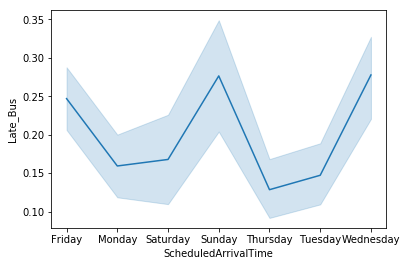

In [0]:
sns.lineplot(mtaa.ScheduledArrivalTime.dt.day_name(), mtaa.Late_Bus)

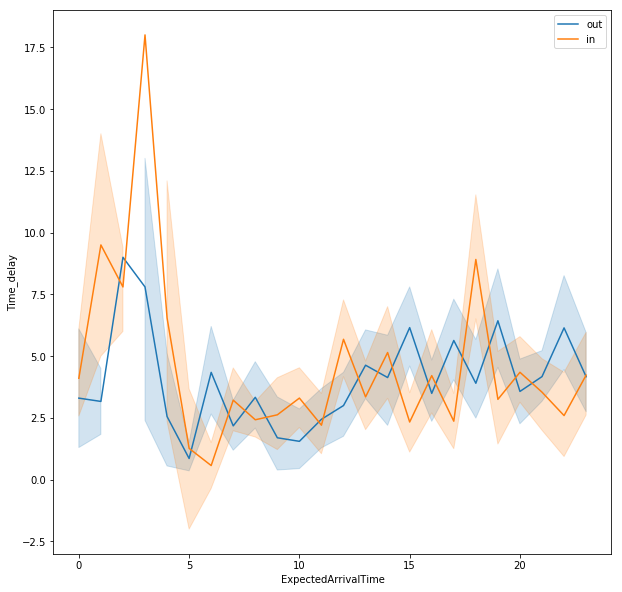

In [0]:

a = mtaa[mtaa.DirectionRef==1]
b = mtaa[mtaa.DirectionRef==0]
plt.figure(figsize=(10,10))
sns.lineplot(a.ExpectedArrivalTime.dt.hour.sort_values(), a.Time_delay, label='out')

sns.lineplot(b.ExpectedArrivalTime.dt.hour.sort_values(), b.Time_delay, label='in')
plt.show()

In [0]:
name_county = []
for i in mta['col']:
        name_county.append(county.get(i))    
mta.loc[:,'Vehc_county'] = name_county
mta.drop('col',1,inplace=True)

In [0]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='VehicleLocation_Long',y='VehicleLocation_Lat', hue=mtaa.ScheduledArrivalTime.dt.hour, data=mtaa[mtaa.DestinationName=='JAMAICA PRSNS - ARCHR via LINDEN'])

NameError: name 'plt' is not defined

In [0]:
mtaa.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,Vehc_county
2,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00,1.0,0,night,Queens County
6955,2017-06-01 04:03:46,1,Q3,165 ST/TERMINAL,40.707558,-73.795502,JFK AIRPORT via FARMERS BL,40.647137,-73.779427,NYCT_8422,40.711354,-73.791230,HILLSIDE AV/171 ST,at stop,30.0,2017-06-01 04:04:13,2017-06-01 04:03:56,0.0,0,morning,Queens County
7143,2017-06-01 04:13:47,1,Q3,165 ST/TERMINAL,40.707558,-73.795502,JFK AIRPORT via FARMERS BL,40.647137,-73.779427,NYCT_8422,40.709129,-73.768116,FARMERS BL/HENDERSON AV,approaching,73.0,2017-06-01 04:14:00,2017-06-01 04:12:25,1.0,0,morning,Queens County
7353,2017-06-01 04:23:16,1,Q3,165 ST/TERMINAL,40.707558,-73.795502,JFK AIRPORT via FARMERS BL,40.647137,-73.779427,NYCT_8422,40.679392,-73.761703,FARMERS BL/MERRICK BL,at stop,0.0,2017-06-01 04:23:48,2017-06-01 04:23:00,0.0,0,morning,Queens County
7599,2017-06-01 04:33:48,1,Q3,165 ST/TERMINAL,40.707558,-73.795502,JFK AIRPORT via FARMERS BL,40.647137,-73.779427,NYCT_8422,40.659790,-73.773647,N BOUNDRY R/CHINA CARGO AIRLINE,< 1 stop away,190.0,2017-06-01 04:34:41,2017-06-01 04:31:28,3.0,0,morning,Queens County


In [0]:
mtaa.groupby(mtaa.ScheduledArrivalTime.dt.hour).mean() 

,DirectionRef,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation_Lat,VehicleLocation_Long,DistanceFromStop,Time_delay,Late_Bus
ScheduledArrivalTime,,,,,,,,,,
0,0.275862,40.672034,-73.777385,40.692439,-73.778834,40.683994,-73.764893,151.137931,3.965517,0.172414
1,0.857143,40.681156,-73.767718,40.679154,-73.791607,40.684941,-73.777210,257.428571,3.428571,0.000000
2,0.428571,40.673112,-73.786434,40.681696,-73.788634,40.697617,-73.776590,71.571429,10.285714,0.857143
3,0.692308,40.689010,-73.790619,40.665746,-73.784385,40.687860,-73.775774,168.923077,10.153846,0.538462
4,0.470588,40.682425,-73.788709,40.685523,-73.791956,40.683018,-73.776419,114.588235,2.000000,0.058824
5,0.551724,40.697573,-73.788138,40.689478,-73.787734,40.700512,-73.778455,123.724138,1.931034,0.068966
6,0.432099,40.691275,-73.769108,40.715806,-73.796373,40.704528,-73.778911,149.432099,2.555556,0.172840
7,0.566038,40.701209,-73.775505,40.711284,-73.791201,40.711231,-73.776916,155.735849,2.415094,0.094340
8,0.471545,40.710980,-73.786768,40.707052,-73.785732,40.710015,-73.781891,136.024390,2.837398,0.154472


From the histograms of our continuous features we can see that we have a very unbalanced target, which would be expected. There should definetly be more on-time busses that late ones. It look like the 'DistanceFromStop' appears to have some outlier that we should take a look at.

We can also see that the time delay is somewhat normally distributed.

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(mta.Time_delay)
norm_stats = normaltest(mta.Time_delay)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Next we need to take at look at the "DistanceFromStop" variable.

In [0]:
# create day of week feature.
mta['day_of_week'] = mta.ScheduledArrivalTime.dt.dayofweek

Let's if there is any difference between the number of late busses of inbound vs outbound busses.

In [0]:
mta[mta.ScheduledArrivalTime.dt.day<26].Late_Bus.value_counts()

In [0]:
sns.scatterplot(mta.DistanceFromStop,mta[mta.Time_delay>=0].Time_delay)

In [0]:
print(mta[mta.DirectionRef==0].Time_delay.mean())
print(mta[mta.DirectionRef==1].Time_delay.mean())
print('T-test: ',stats.ttest_ind(mta[mta.DirectionRef==1].Time_delay,mta[mta.DirectionRef==0].Time_delay))

In [0]:
plt.figure(figsize=(11,8))
plt.subplot(221)
mta[mta.DirectionRef==0].Late_Bus.value_counts().plot(kind='bar')
plt.subplot(222)
mta[mta.DirectionRef==1].Late_Bus.value_counts().plot(kind='bar')
plt.show()
print(mta.groupby('DirectionRef').Late_Bus.value_counts())

In [0]:
def LatLong_to_county(Lat,Long,type_county):
    from uszipcode import SearchEngine
    search = SearchEngine(simple_zipcode=True)
    result=[]
    mta['col'] = mta[Lat].astype(str)+' '+mta[Long].astype(str)
    for i in range(len(mta['col'].unique())):
        result.append(search.by_coordinates(float(mta['col'].unique()[i].split()[0]), float(mta['col'].unique()[i].split()[1]), radius=80, returns=5)[0].values()[5])
    county = {}
    df = pd.DataFrame({'counties' : result, 'geo' : mta['col'].unique()})
    df.head()
   
    for i in mta['col'].unique():
        if i in list(df[df.counties=='Kings County'].geo):
            county.update({i:'Kings County'})
        if i in list(df[df.counties=='Westchester County'].geo):
            county.update({i:'Westchester County'})
        if i in list(df[df.counties=='Queens County'].geo):
            county.update({i:'Queens County'})
        if i in list(df[df.counties=='New York County'].geo):
            county.update({i:'New York County'})
        if i in list(df[df.counties=='Richmond County'].geo):
            county.update({i:'Richmond County'})
        if i in list(df[df.counties=='Bronx County'].geo):
            county.update({i:'Bronx County'})
        if i in list(df[df.counties=='Nassau County'].geo):
            county.update({i:'Nassau County'})
        if i in list(df[df.counties=='Hudson County'].geo):
            county.update({i:'Hudson County'})
        
    mta[type_county] = 0
    name_county = []
    for i in mta['col']:
        name_county.append(county.get(i))    
    mta[type_county] = name_county
    mta.drop('col',1,inplace=True)

In [0]:
#LatLong_to_county('dest_geo','DestinationLat','DestinationLong','dest_county')
LatLong_to_county('OriginLat','OriginLong', 'origin_county')
LatLong_to_county('VehicleLocation_Lat','VehicleLocation_Long', 'vehicle_county')

In [0]:
LatLong_to_county('DestinationLat','DestinationLong','dest_county')

In [0]:
mta.head()

In [0]:





mtaa = mta.sample(frac=.001 ,random_state=20)



len(mtaa)



5804

In [0]:
plt.figure(figsize=(10,35))
mta[mta.Time_delay>0].groupby('PublishedLineName').Time_delay.mean().sort_values(ascending=True).plot(kind='barh')

In [0]:
sns.heatmap(mta[['DistanceFromStop','Time_delay','DirectionRef','Late_Bus']].corr())
plt.show()
mta.corr()

In [0]:
mtaa=mta.sample(frac=.0001)

In [0]:
mta[(mta.ExpectedArrivalTime.dt.day==25)].Time_delay.mean()

In [0]:
mtaa.groupby('VehicleRef').PublishedLineName.value_counts()

VehicleRef  PublishedLineName
NYCT_1218   Bx12                 1
NYCT_1230   Bx4                  1
NYCT_1242   M15-SBS              1
NYCT_1245   M15-SBS              1
NYCT_1246   M15-SBS              1
NYCT_1251   M15-SBS              1
NYCT_1266   M15-SBS              1
NYCT_1268   M15-SBS              1
NYCT_1284   M15-SBS              1
NYCT_1285   M15-SBS              1
NYCT_1287   M35                  1
NYCT_1288   M35                  1
NYCT_2268   X68                  1
NYCT_235    B11                  1
NYCT_2409   X27                  1
NYCT_2414   X37                  1
NYCT_2415   X28                  1
NYCT_242    B11                  1
NYCT_2420   X38                  1
NYCT_2422   X28                  1
NYCT_2428   X28                  1
NYCT_2429   X37                  1
NYCT_2452   X28                  1
NYCT_2472   X27                  1
NYCT_2476   X27                  1
NYCT_248    B43                  1
NYCT_254    B70                  1
NYCT_2579   X10          

In [0]:
mta.sample(frac=.1)[:10]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,Dest_geo,Orig_geo,boroughs
1620475,2017-06-09 06:47:30,0,B69,MC DONALD AV/CORTELYOU RD,40.638161,-73.978935,DNTWN BKLYN SANDS ST via VANDERBILT,40.699913,-73.987648,NYCT_354,40.685867,-73.968384,VANDERBILT AV/GREENE AV,approaching,49.0,2017-06-09 06:47:42,2017-06-09 06:44:05,3.0,0,morning,40.699913 -73.987648,40.638161 -73.97893499999999,Kings County
2987043,2017-06-16 05:48:59,0,B46,FLATBUSH AV/KINGS PLAZA,40.609566,-73.921814,BRIDGE PLZ via UTICA,40.709404,-73.959564,NYCT_4607,40.654193,-73.930644,UTICA AV/LENOX RD,< 1 stop away,166.0,2017-06-16 05:49:38,2017-06-16 05:49:59,0.0,0,morning,40.709404 -73.959564,40.609566 -73.921814,Kings County
3823750,2017-06-20 20:16:13,0,Q4,TEARDROP/LAYOVER,40.701748,-73.802399,CAMBRIA HTS 235 ST via LINDEN,40.690647,-73.727409,NYCT_5161,40.695624,-73.747978,LINDEN BL/FRANCIS LEWIS BL,< 1 stop away,169.0,2017-06-20 20:17:07,2017-06-20 20:17:00,0.0,0,night,40.690647 -73.727409,40.701747999999995 -73.802399,Queens County
656770,2017-06-04 14:28:53,1,Bx22,VALENTINE AV/E FORDHAM RD,40.862431,-73.895859,CASTLE HILL ZEREGA AV,40.814484,-73.847092,NYCT_4780,40.856721,-73.869784,BOSTON RD/PELHAM PKY,approaching,52.0,2017-06-04 14:29:22,2017-06-04 14:23:00,6.0,0,afternoon,40.814484 -73.847092,40.862431 -73.895859,Bronx County
2557740,2017-06-14 07:15:58,0,S94,YUKON AV/KMART DWY,40.575645,-74.167152,LTD ST GEORGE FERRY,40.643742,-74.073212,NYCT_8268,40.643683,-74.073178,ST GEORGE FERRY/ST GEORGE FERRY,at stop,0.0,2017-06-14 07:16:03,2017-06-14 07:06:00,10.0,1,morning,40.643741999999996 -74.073212,40.575645 -74.167152,Richmond County
1567796,2017-06-08 19:36:56,1,M14A,GRAND ST/FDR DR,40.713264,-73.977982,ABINGDON SQ CROSSTOWN,40.737671,-74.005768,NYCT_5640,40.713122,-73.977653,CHERRY ST/JACKSON ST,< 1 stop away,297.0,2017-06-08 19:37:49,2017-06-08 19:31:51,5.0,0,evening,40.737671 -74.005768,40.713264 -73.977982,New York County
616380,2017-06-04 08:29:03,1,M10,FRED DOUGLASS BL/W 158 ST,40.830956,-73.935989,COLUMBUS CIRCLE via CENTRAL PARK W.,40.766529,-73.981964,NYCT_6419,40.830790,-73.936066,FRED DOUGLASS BL/W 155 ST,< 1 stop away,222.0,2017-06-04 08:29:27,2017-06-04 08:36:16,-6.0,0,morning,40.766529 -73.981964,40.830956 -73.935989,New York County
1575404,2017-06-08 20:26:37,1,X10,E 57 ST/3 AV,40.760429,-73.967674,PT RICHMOND via NARROWS RD via GANNON AV,40.633698,-74.129776,NYCT_2646,40.705965,-74.015039,gowanus py/6 av,5.7 miles away,9141.0,2017-06-08 20:42:21,2017-06-08 20:09:44,32.0,1,night,40.633697999999995 -74.129776,40.760428999999995 -73.967674,Richmond County
5652930,2017-06-30 09:32:54,1,Q30,NASSAU BL/LITTLE NECK PY,40.764198,-73.726044,JAMAICA LIRR STA SUTPHIN BL,40.700500,-73.807838,NYCT_8457,40.755914,-73.739273,DOUGLASTON PY/61 AV,at stop,5.0,2017-06-30 09:32:56,2017-06-30 09:32:23,0.0,0,morning,40.7005 -73.807838,40.764198 -73.72604399999999,Queens County
4948577,2017-06-26 19:55:31,0,Bx3,BROADWAY/179 ST,40.849327,-73.936508,RIVERDALE BWAY - 238 ST,40.885086,-73.900436,NYCT_8386,40.885025,-73.900415,W 238 ST/BROADWAY,at stop,3.0,2017-06-26 19:55:42,2017-06-26 19:56:00,0.0,0,evening,40.885086 -73.900436,40.849327 -73.93650799999999,Bronx County


In [0]:
mtaa = mta[mta.Time_delay>=0]#.sample(frac=.001)

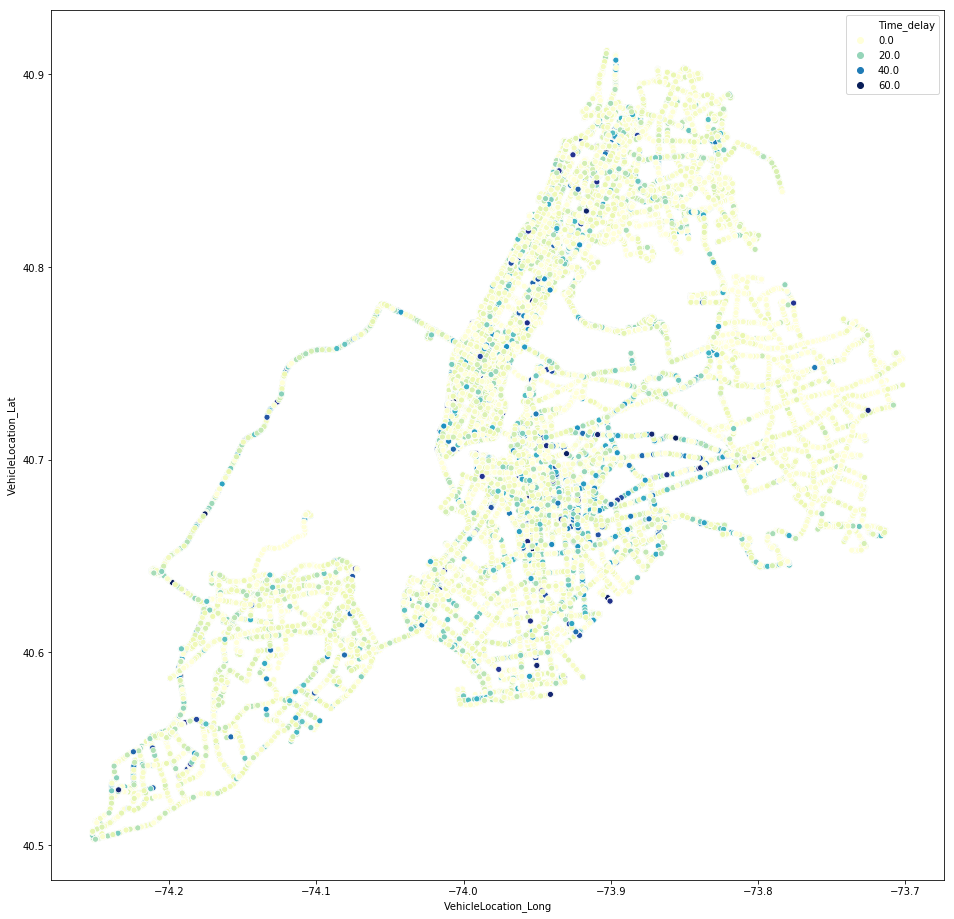

In [0]:
plt.figure(figsize=(16,16))
sns.scatterplot(mtaa['VehicleLocation_Long'],mtaa['VehicleLocation_Lat'], hue=mtaa.Time_delay ,palette= "YlGnBu"  )
plt.legend(loc='best')

In [0]:
plt.figure(figsize=(12,19))
plt.subplot(421)
sns.scatterplot(x=mtaa.OriginLong,  y=mtaa.OriginLat, hue=mtaa.boroughs)
plt.subplot(422)
sns.scatterplot(x=mtaa.DestinationLong,  y=mtaa.DestinationLat, hue=mtaa.boroughs)
plt.subplot(423)
sns.scatterplot(x=mtaa['VehicleLocation.Longitude'] , y=mtaa['VehicleLocation.Latitude'], hue=mtaa.VehicleRef,legend=None)

plt.subplot(424)
sns.scatterplot(x=mtaa['VehicleLocation.Longitude'] , y=mtaa['VehicleLocation.Latitude'], hue=mtaa.b,alpha=.5,legend=None)

plt.show()

In [0]:
mta.columns


In [0]:
stats.ttest_ind( mta[mta.DirectionRef==1].ExpectedArrivalTime.dt.minute, mta[mta.DirectionRef==0].ExpectedArrivalTime.dt.minute)

In [0]:
# Test between the means of the delays of the days of the week
for i in range(0, 7):
        for j in range(i+1, 7):
            print(i,' vs ',j) 
            print(stats.ttest_ind(
                mta[mta.ScheduledArrivalTime.dt.dayofweek==i]['Time_delay'] , 
                 mta[mta.ScheduledArrivalTime.dt.dayofweek==j]['Time_delay']
                ))

In [0]:
mta.columns

In [0]:
a = [4,11,18,25]
b = [5,12,19,26]
c = [6,13,20,27]
d = [7,14,21,28]
e = [1,8,15,22,29]
f = [2,9,16,23,30]
g = [3,10,17,24]
for i in a:
    print('Sunday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus<=1)].Time_delay.mean())
print()
for i in b:
    print('Monday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus==1)].Time_delay.mean())
print()

for i in c:
    print('Tuesday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus==1)].Time_delay.mean())
print()

for i in d:
    print('Wednesday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus==1)].Time_delay.mean())
print()
for i in e:
    print('Thursday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus==1)].Time_delay.mean())
print()
for i in f:
    print('Friday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus==1)].Time_delay.mean())
print()
for i in g:
    print('Saturday',i,mta[(mta.ScheduledArrivalTime.dt.day==i) & (mta.Late_Bus==1)].Time_delay.mean())
print()




In [0]:
mta.columns

In [0]:
plt.figure(figsize=(10,10))
plt.clf()

In [0]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'Time_delay', 'Late_Bus', 'time_of_day',
       'day_of_week', 'boroughs'],
      dtype='object')

In [0]:
%pylab qt
list = ['morning','afternoon','evening','night']
count=0
while count<1:
    for i in list:
        plt.figure(figsize=(15,15))
        plt.scatter(mta[mta.time_of_day==i]['VehicleLocation.Longitude'], mta[mta.time_of_day==i]['VehicleLocation.Latitude'], c=mta[mta.time_of_day==i].Time_delay) 
        plt.pause(2)
        plt.clf()
        count+=1
 

Populating the interactive namespace from numpy and matplotlib


In [0]:
mta['rush_hour'] = 0

In [0]:
index = mta[(mta.ScheduledArrivalTime.dt.hour>=7) & (mta.ScheduledArrivalTime.dt.hour<=9)].index  
indexs = mta[(mta.ScheduledArrivalTime.dt.hour>=16) & (mta.ScheduledArrivalTime.dt.hour<=18)].index

In [0]:
mta.loc[index,'rush_hour'] = 1
mta.loc[indexs,'rush_hour'] = 1

In [0]:
len(mta)

5804118

In [0]:





mta_sample = mta.sample(frac=.001 ,random_state=20)







In [0]:
mta[(mta.rush_hour==2) & (mta.Late_Bus==1)].Time_delay.mean()

In [0]:
mta[pd.to_numeric(mta.rush_hour==1)].ExpectedArrivalTime.dt.minute.mean()

In [0]:
mta[pd.to_numeric(mta.rush_hour==1)].Late_Bus.value_counts()

In [0]:
mta[mta.rush_hour==0].Time_delay.mean()


In [0]:
mtaa

In [0]:
search.by_coordinates(40.663960, -73.759315, radius=80, returns=5)[0].values()[5]

'Queens County'

In [0]:
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


In [0]:

mta.head() 

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,day_of_week,rush_hour
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14,-2.0,0,morning,3,0
1,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53,3.0,0,night,3,0
2,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00,1.0,0,night,3,0
3,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,2017-06-01 00:02:35,1.0,0,night,3,0
4,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,2017-06-01 00:00:01,3.0,0,night,3,0


In [0]:
mta_s = pd.concat([mta, pd.get_dummies(mta.day_of_week.astype('category'),drop_first=True),], axis=1)
mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.time_of_day.astype('category'),drop_first=True),], axis=1)
#mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.PublishedLineName.astype('category'),drop_first=True),], axis=1)
mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.boroughs.astype('category'),drop_first=True),], axis=1)
#mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.day_of_week.astype('category'),drop_first=True),], axis=1) 
#mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.DestinationName.astype('category'),drop_first=True),], axis=1)
mta_s.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,hour,day_of_month,day_of_week,rush_hour,Dest_geo,Orig_geo,boroughs,sin_hour,cos_hour,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,evening,morning,night,Hudson County,Kings County,Nassau County,New York County,Queens County,Richmond County,Westchester County
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14,-2.0,0,morning,0,1,1,0,40.656048 -73.907379,40.616104 -74.031143,Kings County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53,3.0,0,night,0,1,1,0,40.912376 -73.902534,40.875008 -73.880142,Westchester County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00,1.0,0,night,0,1,1,0,40.666012 -73.735939,40.701747999999995 -73.802399,Queens County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,2017-06-01 00:02:35,1.0,0,night,0,1,1,0,40.82111 -73.935898,40.731342 -73.990288,New York County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,2017-06-01 00:00:01,3.0,0,night,0,1,1,0,40.642990000000005 -73.878326,40.57708 -73.98129300000001,Kings County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [0]:
bus_count = []
Time_delay = []
for i in mta.ScheduledArrivalTime.dt.hour.unique():
    bus_count.append(mta[mta.ScheduledArrivalTime.dt.hour==i].VehicleRef.value_counts().mean())
    Time_delay.append(mta[mta.ScheduledArrivalTime.dt.hour==i].Time_delay.mean())

In [0]:
features= [ 'Hudson County', 'Kings County',
       'Nassau County', 'New York County', 'Queens County',
       'Richmond County', 'Westchester County']
       
 
mta_sample = mta_s[mta_s.ScheduledArrivalTime.dt.day<27].sample(frac=.001,random_state=20)
Y = mta_sample['Late_Bus'] 
X = mta_sample[features]


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

 # Automatic feature selection with SelectKbest
import sklearn.feature_selection 
#from sklearn.feature_selection import f_regression
select =sklearn.feature_selection.SelectKBest(k=7)
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

X = mta_sample[colnames_selected]
Y = mta_sample['Late_Bus']



# Standardizing data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#scaler.fit(x_train_selected) 
#X_train = scaler.transform(x_train_selected)
#X_test = scaler.transform(x_test_selected)



['Hudson County', 'Kings County', 'Nassau County', 'New York County', 'Queens County', 'Richmond County', 'Westchester County']


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
X_train = x_train_selected
X_test = x_test_selected

In [0]:
sns.heatmap(pd.DataFrame(X_train).corr())

In [0]:

from sklearn.preprocessing import normalize
X_train = normalize(X_train)



In [0]:

 # Create balanced classes for the training set
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=20)
X_train, y_train = ros.fit_sample(X_train, y_train)


# Modeling

In [0]:
mnb = MultinomialNB() 
neighbors = KNeighborsClassifier(n_neighbors=35) 
decision_tree = tree.DecisionTreeClassifier(max_leaf_nodes=100)
rfc = ensemble.RandomForestClassifier(n_estimators=100,class_weight='balanced') 
svc = SVC(probability=True, gamma='auto') 
lr = LogisticRegression(solver='lbfgs' ) 
clf = ensemble.GradientBoostingClassifier(n_estimators=100)
models = [ neighbors, decision_tree, rfc, lr, svc, clf]
for model in models:
    print(str(model))
    model.fit(X_train,y_train)
    print()
    print(model.roc_auc_score(X_test,y_test))
    print(model.recall_score(X_test,y_test))
    print()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=35, p=2,
           weights='uniform')

0.7459839357429718

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.4789156626506024

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

0.4789156

### Naive Bayes

In [0]:
# Instatiate the model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(fit_prior=True) 

Accuracy score : 0.7335045216032153
ROC_AUC cross validataion score:  [0.60939958 0.61336078 0.60878732 0.59677988 0.61584963]

Consfusion Matrix
col_0        0
Late_Bus      
0         6570
1         2387

Classification Report
              precision    recall  f1-score   support

     On-time       0.73      1.00      0.85      6570
        Late       0.00      0.00      0.00      2387

   micro avg       0.73      0.73      0.73      8957
   macro avg       0.37      0.50      0.42      8957
weighted avg       0.54      0.73      0.62      8957

AUC: 0.606


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


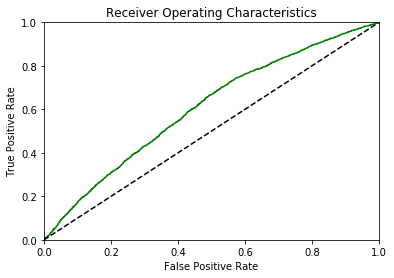

In [0]:
# Confusion matrix

def AUC_ROC_plot(model,X_train,y_train,X_test,y_test,color): 
    model.fit(X_train , y_train)
    y_prob = cross_val_predict(model, X_test, y_test, method='predict_proba',cv=5)    
    auc = roc_auc_score(y_test,y_prob[:,1])
    print('AUC: %.3f' % auc)
    fpr, tpr,thresholds = roc_curve(y_test,y_prob[:,1])
    plt.plot(fpr,tpr,color)    
    plt.plot([0.0,1.0],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.xlim([0.0,1.0])     
    plt.ylim([0.0,1.0])

    
def Metrics(model, X_train , y_train, X_test, y_test,):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    
    print('Accuracy score :',model.score( X_test , y_test,))
    print('ROC_AUC cross validataion score: ',cross_val_score(model, X_test , y_test, cv=5,scoring='roc_auc'))
    print()
    print("Consfusion Matrix")
    print(pd.crosstab(y_test,y_pred))
    print()

    # Classification report
    print("Classification Report")
    from sklearn.metrics import classification_report

    target_names = ['On-time','Late']
    print(classification_report(y_test,y_pred, target_names=target_names))
    AUC_ROC_plot(model,X_train,y_train,X_test,y_test,'g')
    plt.show()
Metrics(mnb, X_train , y_train, X_test, y_test)

In [0]:
# initiate GridsearchCV for best parameters
from sklearn.model_selection import GridSearchCV
def gridsearch(model, X_train , y_train, param_grid):    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', return_train_score=True)
    grid.fit(X_train , y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    
    
param_grid = dict(alpha=np.arange(1,5,1),fit_prior=(True,False))    
gridsearch(mnb, X_train , y_train, param_grid)

{'alpha': 1, 'fit_prior': True}
0.6060748565405366


Accuracy score : 0.6275100401606426
ROC_AUC cross validataion score:  [0.6195552  0.59428872 0.59257797 0.59351351 0.63290541]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         492  251
1         120  133

Classification Report
              precision    recall  f1-score   support

     On-time       0.80      0.66      0.73       743
        Late       0.35      0.53      0.42       253

   micro avg       0.63      0.63      0.63       996
   macro avg       0.58      0.59      0.57       996
weighted avg       0.69      0.63      0.65       996

AUC: 0.605


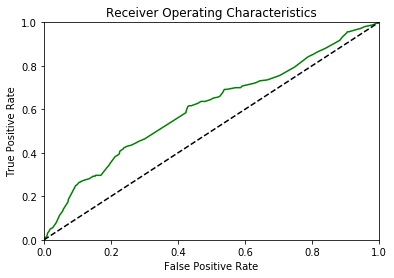

In [0]:
# refit model with new prams
mnb = MultinomialNB(alpha=1, fit_prior=True)
Metrics(mnb, X_train , y_train,X_test,y_test) 

### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(algorithm='auto', n_neighbors=20) 
Metrics(neighbors, X_train , y_train, X_test, y_test) 
 

NameError: name 'Metrics' is not defined

In [0]:
param_grid = 
gridsearch(neighbors, X_train , y_train, param_grid)

SyntaxError: invalid syntax (<ipython-input-291-e4e2249c1885>, line 1)

Accuracy score : 0.7439759036144579
ROC_AUC cross validataion score:  [0.59442032 0.58560337 0.58231346 0.545      0.59621622]

Consfusion Matrix
col_0       0   1
Late_Bus         
0         729  14
1         241  12

Classification Report
              precision    recall  f1-score   support

     On-time       0.75      0.98      0.85       743
        Late       0.46      0.05      0.09       253

   micro avg       0.74      0.74      0.74       996
   macro avg       0.61      0.51      0.47       996
weighted avg       0.68      0.74      0.66       996

AUC: 0.578


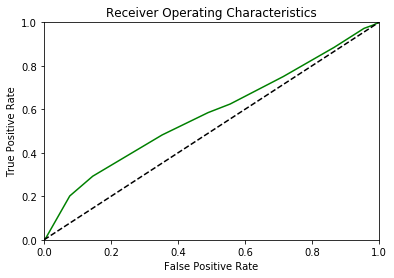

In [0]:
# refit model with new params 
neighbors = KNeighborsClassifier(n_neighbors=2,weights='distance',p=2)
neighbors = KNeighborsClassifier(algorithm='auto', n_neighbors=20) 
Metrics(neighbors, X_train , y_train, X_test, y_test) 


 

The model did poorly when n_neighbors was set at 10. Our test set is imbalanced so the neighbors for the under-reperesented class are sparce. Increasing the n_neighbors significantly improved the results. There is still obviouly room for improvment but that could come from better preprocessing.

### Desision trees

In [0]:
from sklearn import tree
# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(max_features= 'sqrt', random_state=20,)
Metrics(decision_tree, X_train , y_train, X_test, y_test) 


NameError: name 'Metrics' is not defined

In [0]:
# initiate GridsearchCV
param_grid = dict(max_depth=range(30,80,10), max_leaf_nodes=range(300,600,100) )
gridsearch(decision_tree, X_train , y_train, param_grid)

{'max_depth': 30, 'max_leaf_nodes': 300}
0.6191912596781233


Accuracy score : 0.5160642570281124
ROC_AUC cross validataion score:  [0.58303724 0.56060008 0.5670483  0.55594595 0.61905405]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         334  409
1          73  180

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.45      0.58       743
        Late       0.31      0.71      0.43       253

   micro avg       0.52      0.52      0.52       996
   macro avg       0.56      0.58      0.50       996
weighted avg       0.69      0.52      0.54       996

AUC: 0.565


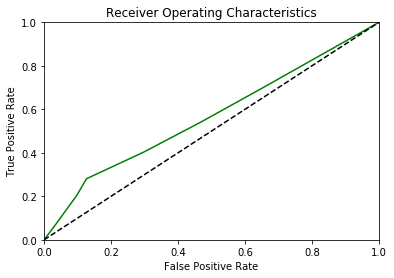

In [0]:
# refit model with new params
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=10000, max_features=None,
                                            max_leaf_nodes=2 ,random_state=20,class_weight='balanced')
Metrics(decision_tree, X_train , y_train, X_test, y_test) 


### Random forrest

In [0]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# instantiate model
rfc = ensemble.RandomForestClassifier(n_estimators=30) 
Metrics(rfc, X_train , y_train, X_test, y_test) 

NameError: name 'Metrics' is not defined

In [0]:
# initiate GridsearchCV
param_grid = dict(max_depth=range(1,6,1), max_leaf_nodes=range(2,10,1))
gridsearch(decision_tree, X_train , y_train, param_grid)

{'max_depth': 4, 'max_leaf_nodes': 9}
0.6122879410638925


Accuracy score : 0.5652610441767069
ROC_AUC cross validataion score:  [0.63929464 0.60034215 0.54967759 0.56986486 0.59682432]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         399  344
1          89  164

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.54      0.65       743
        Late       0.32      0.65      0.43       253

   micro avg       0.57      0.57      0.57       996
   macro avg       0.57      0.59      0.54       996
weighted avg       0.69      0.57      0.59       996

AUC: 0.585


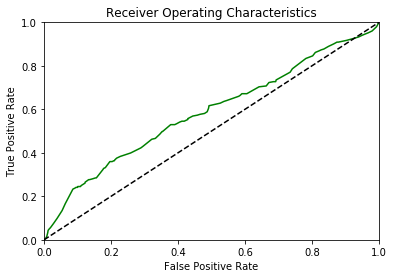

In [0]:
# refit model with new params
rfc = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=4, max_leaf_nodes=9,class_weight='balanced') 
Metrics(rfc, X_train , y_train, X_test, y_test) 

In [0]:
precision_recall_plot (rfc,X_test,y_test) 
plt.show()

NameError: name 'precision_recall_plot' is not defined

In [0]:
y_prob = rfc.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.55)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         411  332
1          94  159

Classification Report
                  precision    recall  f1-score   support

  positve review       0.81      0.55      0.66       743
negative reviews       0.32      0.63      0.43       253

       micro avg       0.57      0.57      0.57       996
       macro avg       0.57      0.59      0.54       996
    weighted avg       0.69      0.57      0.60       996


Confusion Matrix with binarized class:
col_0     0.0  1.0
Late_Bus          
0         459  284
1         121  132

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.79      0.62      0.69       743
negative reviews       0.32      0.52      0.39       253

       micro avg       0.59      0.59      0.59       996
       macro avg       0.55      0.57      0.54       996
    weighted avg       0.67      0.59      0.62       996



### Logistic regression

In [0]:
# Declare a logistic regression classifier.
lr = LogisticRegression(random_state=20, fit_intercept=False ,solver='saga',max_iter=100, penalty='l1',C=1) 
 
Metrics(lr, X_train , y_train, X_test, y_test) 


# Display.
print()
print('Coefficients')
print(fit.coef_)
print(fit.intercept_) 

NameError: name 'Metrics' is not defined

In [0]:
# initiate GridsearchCV
param_grid = dict(max_iter=range(2,55,1),class_weight=(None,'balanced'))
gridsearch(lr, X_train , y_train, param_grid)


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packa

{'class_weight': None, 'max_iter': 3}
0.6077860727888225


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy score : 0.6275100401606426
ROC_AUC cross validataion score:  [0.64798    0.61468614 0.61863403 0.58256757 0.62844595]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         492  251
1         120  133

Classification Report
              precision    recall  f1-score   support

     On-time       0.80      0.66      0.73       743
        Late       0.35      0.53      0.42       253

   micro avg       0.63      0.63      0.63       996
   macro avg       0.58      0.59      0.57       996
weighted avg       0.69      0.63      0.65       996

AUC: 0.612

Coefficients
[[-0.30633663  0.27808635  0.10812657  0.04000211  0.44207154 -0.5057509
   0.03530981]]
0.0


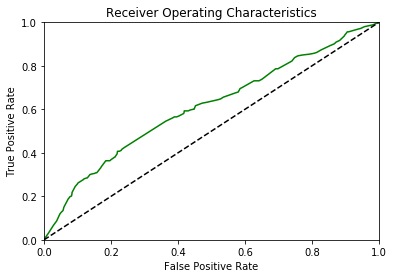

In [0]:
lr = LogisticRegression(random_state=20, fit_intercept=False ,solver='liblinear',class_weight='balanced', max_iter=15) 
 
# refit the model with new params.
fit = lr.fit(X_train, y_train)

Metrics(lr, X_train , y_train, X_test, y_test) 
print()

# Display 
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lr.predict(X_test)



In [0]:
precision_recall_plot (lr,X_test,y_test) 
plt.show()

In [0]:
y_prob = lr.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.12)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         480  353
1         130  198

Classification Report
                  precision    recall  f1-score   support

  positve review       0.79      0.58      0.67       833
negative reviews       0.36      0.60      0.45       328

       micro avg       0.58      0.58      0.58      1161
       macro avg       0.57      0.59      0.56      1161
    weighted avg       0.67      0.58      0.60      1161


Confusion Matrix with binarized class:
col_0     1.0
Late_Bus     
0         833
1         328

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.00      0.00      0.00       833
negative reviews       0.28      1.00      0.44       328

       micro avg       0.28      0.28      0.28      1161
       macro avg       0.14      0.50      0.22      1161
    weighted avg       0.08      0.28      0.12      1161



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [0]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',probability=True) 
Metrics(svc, X_train , y_train, X_test, y_test) 

NameError: name 'Metrics' is not defined

In [0]:
param_grid = dict(C=np.arange(.1,5,.1))
gridsearch(lr, X_train , y_train, param_grid)


Accuracy score : 0.5160642570281124
ROC_AUC cross validataion score:  [0.6514015  0.56652191 0.61698908 0.60648649 0.63716216]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         334  409
1          73  180

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.45      0.58       743
        Late       0.31      0.71      0.43       253

   micro avg       0.52      0.52      0.52       996
   macro avg       0.56      0.58      0.50       996
weighted avg       0.69      0.52      0.54       996

AUC: 0.588


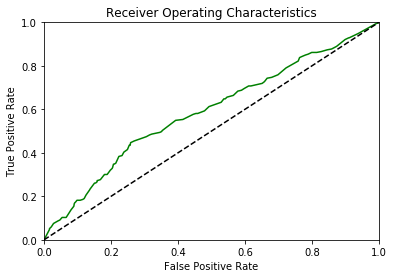

In [0]:
# refit model with new params
svc = SVC(kernel='linear',class_weight='balanced',probability=True) 
Metrics(svc, X_train , y_train, X_test, y_test) 

In [0]:
precision_recall_plot (svc,X_test,y_test) 
plt.show()

In [0]:
y_prob = svc.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.51)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         368  465
1         87   241

Classification Report
                  precision    recall  f1-score   support

  positve review       0.81      0.44      0.57       833
negative reviews       0.34      0.73      0.47       328

       micro avg       0.52      0.52      0.52      1161
       macro avg       0.58      0.59      0.52      1161
    weighted avg       0.68      0.52      0.54      1161


Confusion Matrix with binarized class:
col_0     0.0
Late_Bus     
0         833
1         328

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.72      1.00      0.84       833
negative reviews       0.00      0.00      0.00       328

       micro avg       0.72      0.72      0.72      1161
       macro avg       0.36      0.50      0.42      1161
    weighted avg       0.51      0.72      0.60      1161



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Gradient boost

In [0]:
from sklearn import ensemble 

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=2,
                                          loss='deviance', random_state=20) 
Metrics(clf, X_train , y_train, X_test, y_test) 

NameError: name 'Metrics' is not defined

In [0]:
# initiate GridsearchCV
param_grid = dict(max_depth=range(1,6,1), max_leaf_nodes=range(2,10,1))
Metrics(svc, X_train , y_train, X_test, y_test) 

Accuracy score : 0.572289156626506
ROC_AUC cross validataion score:  [0.60442163 0.59968417 0.52954336 0.56554054 0.56628378]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         411  332
1          94  159

Classification Report
              precision    recall  f1-score   support

     On-time       0.81      0.55      0.66       743
        Late       0.32      0.63      0.43       253

   micro avg       0.57      0.57      0.57       996
   macro avg       0.57      0.59      0.54       996
weighted avg       0.69      0.57      0.60       996

AUC: 0.572


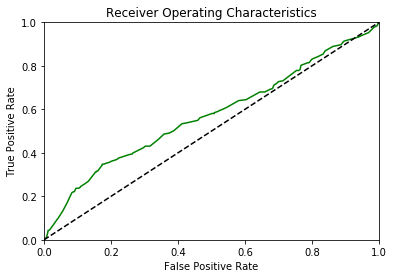

In [0]:
# refit model with new params.
clf = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=2,
                                          loss='deviance', random_state=20) 
Metrics(clf, X_train , y_train, X_test, y_test) 

In [0]:
precision_recall_plot (clf,X_test,y_test) 
plt.show()

NameError: name 'precision_recall_plot' is not defined

In [0]:
y_prob = clf.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.51)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         492  251
1         120  133

Classification Report
                  precision    recall  f1-score   support

  positve review       0.80      0.66      0.73       743
negative reviews       0.35      0.53      0.42       253

       micro avg       0.63      0.63      0.63       996
       macro avg       0.58      0.59      0.57       996
    weighted avg       0.69      0.63      0.65       996


Confusion Matrix with binarized class:
col_0     0.0  1.0
Late_Bus          
0         453  290
1         117  136

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.79      0.61      0.69       743
negative reviews       0.32      0.54      0.40       253

       micro avg       0.59      0.59      0.59       996
       macro avg       0.56      0.57      0.55       996
    weighted avg       0.67      0.59      0.62       996

